# COGS 108 - EDA Checkpoint

# Names

- David Em-Yinn
- Jing Li
- Anna Hsieh
- Alejandro Garcia Martinez
- Christian Gonzalez

<a id='research_question'></a>
# Research Question

*Is there a relationship between stimulus checks and covid infection rates across the counties of California between March 2020 to February 2021?*

# Setup

In [2]:
## YOUR CODE HERE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime

# Data Cleaning

### Data Set 1: Covid Rates by County
---

We first checked the unique values in the area column to find that it also included California, out of state, and unknown, so we removed those columns. Then we added a new column for the positivity rate by calculating it from the number of positive tests and the number of total tests. We only need the daily rates by county, so we selected the columns 'date', 'area', and 'rate' and renamed 'area' to 'county'. Lastly, we filtered the data to only include data from March 2020 to February 2021. 

In [53]:
covid_df = pd.read_csv('https://data.chhs.ca.gov/dataset/f333528b-4d38-4814-bebb-12db1f10f535/resource/046cdd2b-31e5-4d34-9ed3-b48cdbc4be7a/download/covid19cases_test.csv')
covid_df = covid_df[~covid_df.area.isin(['California', 'Out of state', 'Unknown'])]
covid_df = covid_df.assign(rate = covid_df['positive_tests'] / covid_df['total_tests'] * 100)
covid_df = covid_df[['date', 'area', 'rate']]
covid_df = covid_df.rename({'area':'county'}, axis='columns')
covid_df = covid_df.loc[(covid_df['date'] >= '2020-03-01') & (covid_df['date'] <= '2021-02-27')]
covid_df = covid_df.reset_index()
covid_df = covid_df.drop(columns=['index'])
covid_df['date'] = pd.to_datetime(covid_df['date'], format='%Y-%m-%d')
covid_df

,date,county,rate
0,2020-03-01,Alameda,0.000000
1,2020-03-02,Alameda,0.000000
2,2020-03-03,Alameda,0.000000
3,2020-03-04,Alameda,4.545455
4,2020-03-05,Alameda,0.000000
...,...,...,...
21107,2021-02-23,Yuba,1.824818
21108,2021-02-24,Yuba,7.070707
21109,2021-02-25,Yuba,6.572770
21110,2021-02-26,Yuba,5.405405


### Data Set 2: Stimulus Check Amounts
---

In order to create the data for the stimulus check, we were able to find all the data needed online [Stimulus Check 1 Source](https://www.irs.gov/pub/irs-utl/e-poster_payments.pdf) and [Stimulus Check 2 Source](https://www.irs.gov/newsroom/treasury-and-irs-begin-delivering-second-round-of-economic-impact-payments-to-millions-of-americans). We created a data frame that has two rows for the two stimulus checks we will be comparing. 

In the columns, we included the range of the disbursement dates, the base amount, amount given to a married couple, additional amount, and a the amounts that were given to families depending on how many qualified dependents or children they have in the form of tuples (x, y) where x represents a single parent family and y is a married couple family. 

The purpose of this data is for the reader to be able to see what the stimulus checks are, and how much was given to families. 

In [54]:
stimulus_data = {
    'range of disbursement': ['April 2020 - June 2020', 'December 2020 - January 2021'],
    'base': [1200, 600],
    'married couple': [2400, 1200],
    'amount per additional dependent': [500, 600],
    'one dependent': [(1700, 2900), (1200, 1800)],
    'two dependents': [(2200, 3400), (1800, 2400)],
    'three dependents': [(2700, 3900), (2400, 3000)],
    'four dependents': [(3200, 4400), (3000, 3600)],
    'five dependents': [(3700, 4900), (3600, 4200)],
    'six dependents': [(4200, 5400), (4200, 4800)]
}
stimulus_df = pd.DataFrame(stimulus_data, index = ['Stimulus Check 1', 'Stimulus Check 2'])
stimulus_df.head()

,range of disbursement,base,married couple,amount per additional dependent,one dependent,two dependents,three dependents,four dependents,five dependents,six dependents
Stimulus Check 1,April 2020 - June 2020,1200,2400,500,"(1700, 2900)","(2200, 3400)","(2700, 3900)","(3200, 4400)","(3700, 4900)","(4200, 5400)"
Stimulus Check 2,December 2020 - January 2021,600,1200,600,"(1200, 1800)","(1800, 2400)","(2400, 3000)","(3000, 3600)","(3600, 4200)","(4200, 4800)"


### 

# Data Analysis & Results (EDA)

We decided to work with a subset of California counties, and decided with the top 10 most populated counties because areas with more people are more likely to have more cases.

In [5]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
covid_df_subset = covid_df[(covid_df['county'] == 'Los Angeles') | 
                           (covid_df['county'] == 'San Diego') | 
                           (covid_df['county'] == 'Orange') | 
                           (covid_df['county'] == 'Riverside') | 
                           (covid_df['county'] == 'San Bernardino') | 
                           (covid_df['county'] == 'Alameda') | 
                           (covid_df['county'] == 'Sacramento') | 
                           (covid_df['county'] == 'Santa Clara') |
                           (covid_df['county'] == 'Contra Costa') | 
                           (covid_df['county'] == 'Fresno')]
covid_df_stim1 = covid_df[((covid_df['county'] == 'Los Angeles') | 
                           (covid_df['county'] == 'San Diego') | 
                           (covid_df['county'] == 'Orange') | 
                           (covid_df['county'] == 'Riverside') | 
                           (covid_df['county'] == 'San Bernardino') | 
                           (covid_df['county'] == 'Alameda') | 
                           (covid_df['county'] == 'Sacramento') | 
                           (covid_df['county'] == 'Santa Clara') |
                           (covid_df['county'] == 'Contra Costa') | 
                           (covid_df['county'] == 'Fresno'))  & 
                           (covid_df['date'] <= '2020-08-29')]
covid_df_stim2 = covid_df[((covid_df['county'] == 'Los Angeles') | 
                           (covid_df['county'] == 'San Diego') | 
                           (covid_df['county'] == 'Orange') | 
                           (covid_df['county'] == 'Riverside') | 
                           (covid_df['county'] == 'San Bernardino') | 
                           (covid_df['county'] == 'Alameda') | 
                           (covid_df['county'] == 'Sacramento') | 
                           (covid_df['county'] == 'Santa Clara') |
                           (covid_df['county'] == 'Contra Costa') | 
                           (covid_df['county'] == 'Fresno'))  & 
                           (covid_df['date'] > '2020-08-29')]

In [55]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
covid_df_stim1 = covid_df[(covid_df['date'] <= '2020-08-29')]
covid_df_stim2 = covid_df[(covid_df['date'] > '2020-08-29')]

Here we take a look at the overall trend of all 10 counties from March 2020 to February 2021. We can see that overall, the counties are increasing and decreasing at around the same periods of time. The periods in which the stimulus checks were sent out are highlighted in red. At first glance, it looks like the positive rates are declining when the stimulus checks were issued.

(0.0, 100.0)

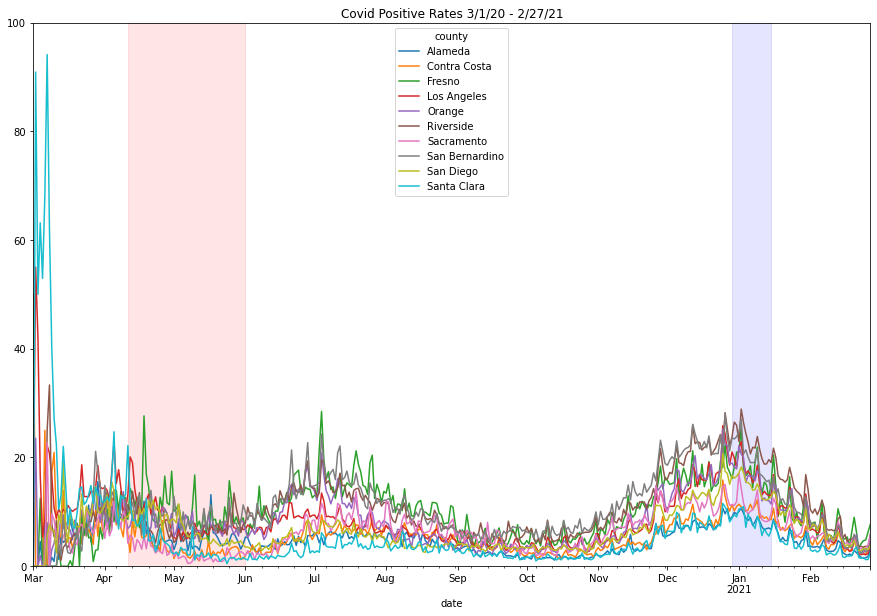

In [6]:
# og
ax = covid_df_subset.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 10))
ax.set_title('Covid Positive Rates 3/1/20 - 2/27/21')
ax.axvspan(dates.datestr2num('2020-04-11'), dates.datestr2num('2020-06-1'), color='red', alpha=0.1)
ax.axvspan(dates.datestr2num('2020-12-29'), dates.datestr2num('2021-01-15'), color='blue', alpha=0.1)
plt.ylim(0, 100)

(0.0, 100.0)

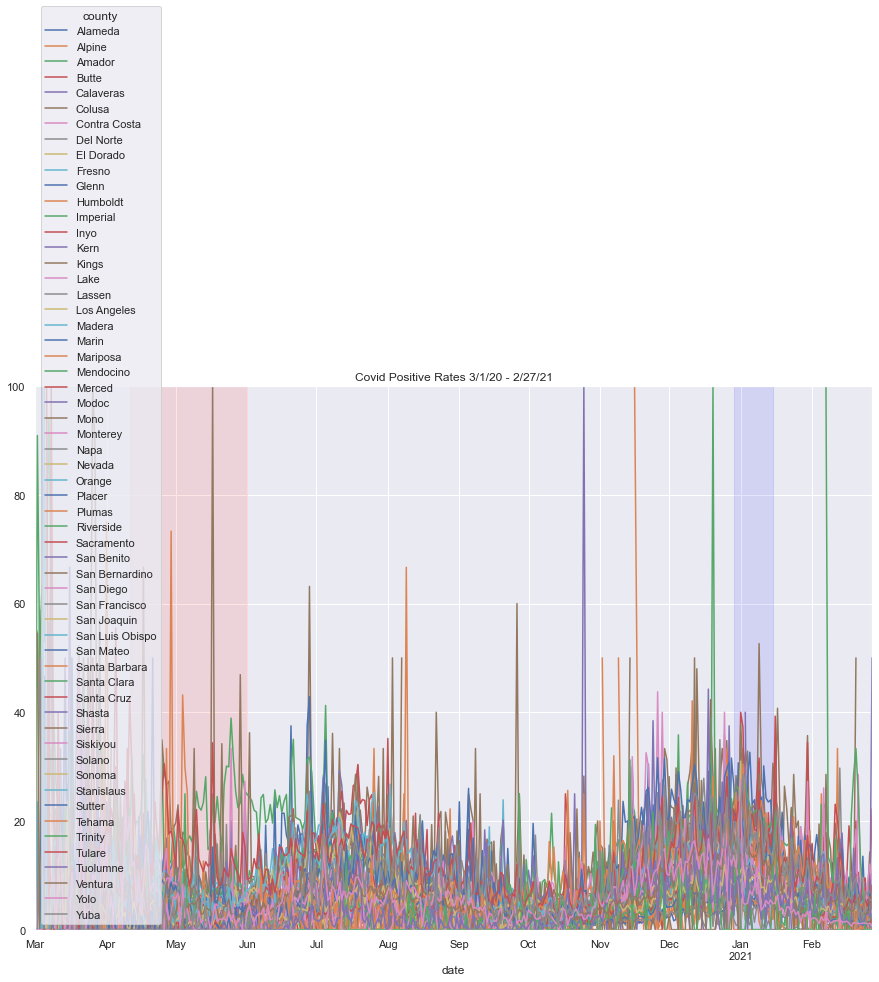

In [56]:
# new
ax = covid_df.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 10))
ax.set_title('Covid Positive Rates 3/1/20 - 2/27/21')
ax.axvspan(dates.datestr2num('2020-04-11'), dates.datestr2num('2020-06-1'), color='red', alpha=0.1)
ax.axvspan(dates.datestr2num('2020-12-29'), dates.datestr2num('2021-01-15'), color='blue', alpha=0.1)
plt.ylim(0, 100)

In [7]:
# get rid of this...
la1 = covid_df_stim1[(covid_df_stim1['county'] == 'Los Angeles')]
la2 = covid_df_stim2[(covid_df_stim2['county'] == 'Los Angeles')]
la = covid_df[(covid_df['county'] == 'Los Angeles')]

sd1 = covid_df_stim1[(covid_df_stim1['county'] == 'San Diego')]
sd2 = covid_df_stim2[(covid_df_stim2['county'] == 'San Diego')]
sd = covid_df[(covid_df['county'] == 'San Diego')]

orange1= covid_df_stim1[(covid_df_stim1['county'] == 'Orange')]
orange2 = covid_df_stim2[(covid_df_stim2['county'] == 'Orange')]
orange = covid_df[(covid_df['county'] == 'Orange')]

riverside1 = covid_df_stim1[(covid_df_stim1['county'] == 'Riverside')]
riverside2 = covid_df_stim2[(covid_df_stim2['county'] == 'Riverside')]
riverside = covid_df[(covid_df['county'] == 'Riverside')]

sb1 = covid_df_stim1[(covid_df_stim1['county'] == 'San Bernardino')]
sb2 = covid_df_stim2[(covid_df_stim2['county'] == 'San Bernardino')]
sb = covid_df[(covid_df['county'] == 'San Bernardino')]

alameda1 = covid_df_stim1[(covid_df_stim1['county'] == 'Alameda')]
alameda2 = covid_df_stim2[(covid_df_stim2['county'] == 'Alameda')]
alameda = covid_df[(covid_df['county'] == 'Alameda')]

sac1 = covid_df_stim1[(covid_df_stim1['county'] == 'Sacramento')]
sac2 = covid_df_stim2[(covid_df_stim2['county'] == 'Sacramento')]
sac = covid_df[(covid_df['county'] == 'Sacramento')]

sc1 = covid_df_stim1[(covid_df_stim1['county'] == 'Santa Clara')]
sc2 = covid_df_stim2[(covid_df_stim2['county'] == 'Santa Clara')]
sc = covid_df[(covid_df['county'] == 'Santa Clara')]

cc1 = covid_df_stim1[(covid_df_stim1['county'] == 'Contra Costa')]
cc2 = covid_df_stim2[(covid_df_stim2['county'] == 'Contra Costa')]
cc = covid_df[(covid_df['county'] == 'Contra Costa')]

fresno1 = covid_df_stim1[(covid_df_stim1['county'] == 'Fresno')]
fresno2 = covid_df_stim2[(covid_df_stim2['county'] == 'Fresno')]
fresno = covid_df[(covid_df['county'] == 'Fresno')]

Next, we'll take a look at the individual rates of each county for the same time period to gain a better understanding of the trend of each county. Although less noticeable now, we can still see that the counties have similiar trends.

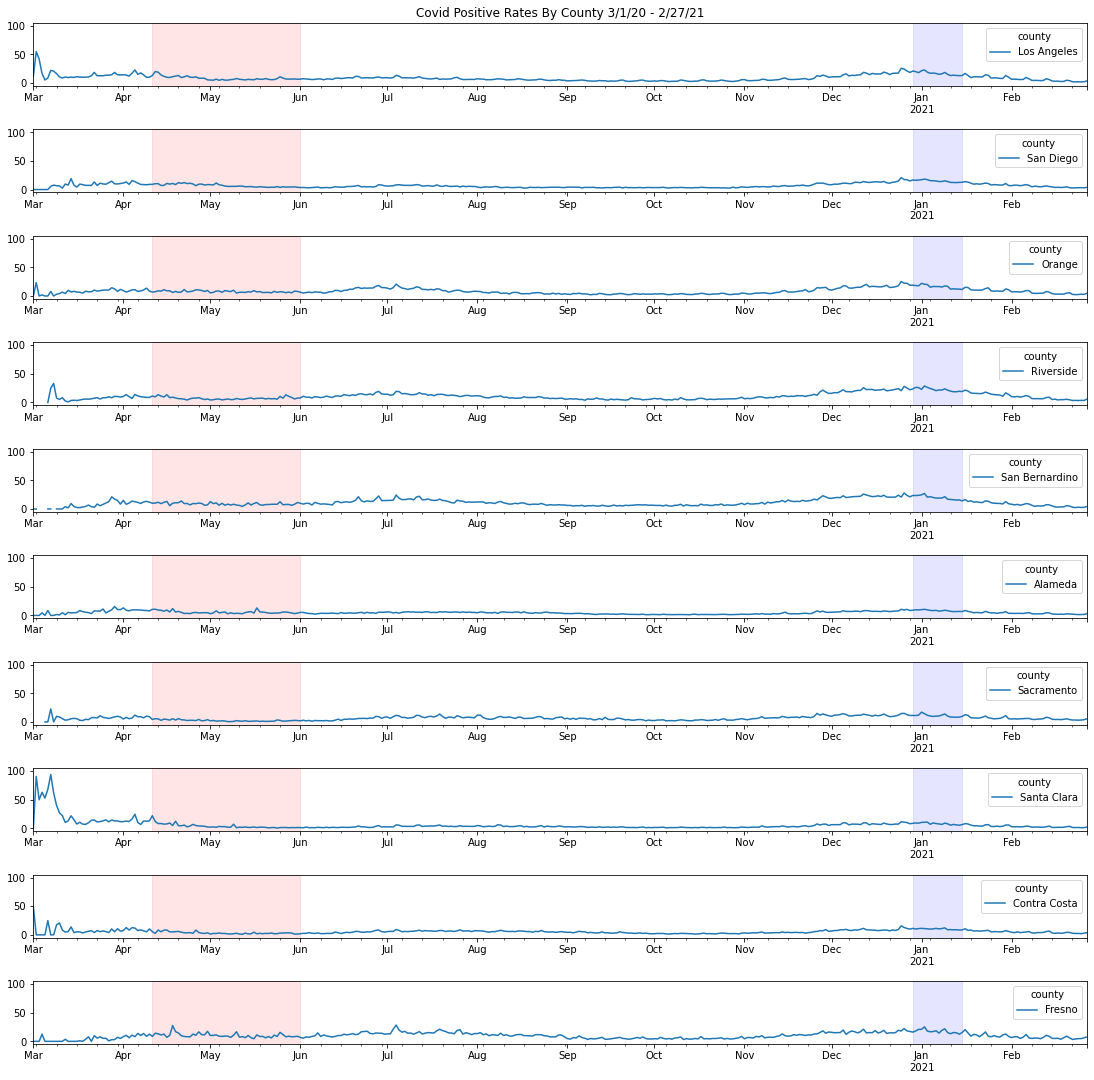

In [8]:
# get rid of this too
fig, axes = plt.subplots(ncols = 1, nrows = 10, sharey = True)
axes[0].set_title('Covid Positive Rates By County 3/1/20 - 2/27/21')
la.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[0])
sd.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[1])
orange.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[2])
riverside.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[3])
sb.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[4])
alameda.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[5])
sac.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[6])
sc.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[7])
cc.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[8])
fresno.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[9])

fig.tight_layout(pad=0.01)
for x in range(0,10):
        axes[x].set(xlabel=None)
        axes[x].axvspan(dates.datestr2num('2020-04-11'), dates.datestr2num('2020-06-1'), color='red', alpha=0.1)
        axes[x].axvspan(dates.datestr2num('2020-12-29'), dates.datestr2num('2021-01-15'), color='blue', alpha=0.1)

Now we'll split the time periods into two because we'll be looking at both stimulus checks separately. The first stimulus check was issued during the first 6 months of our dataset, and the second stimulus check was issued during the latter half of our dataset.

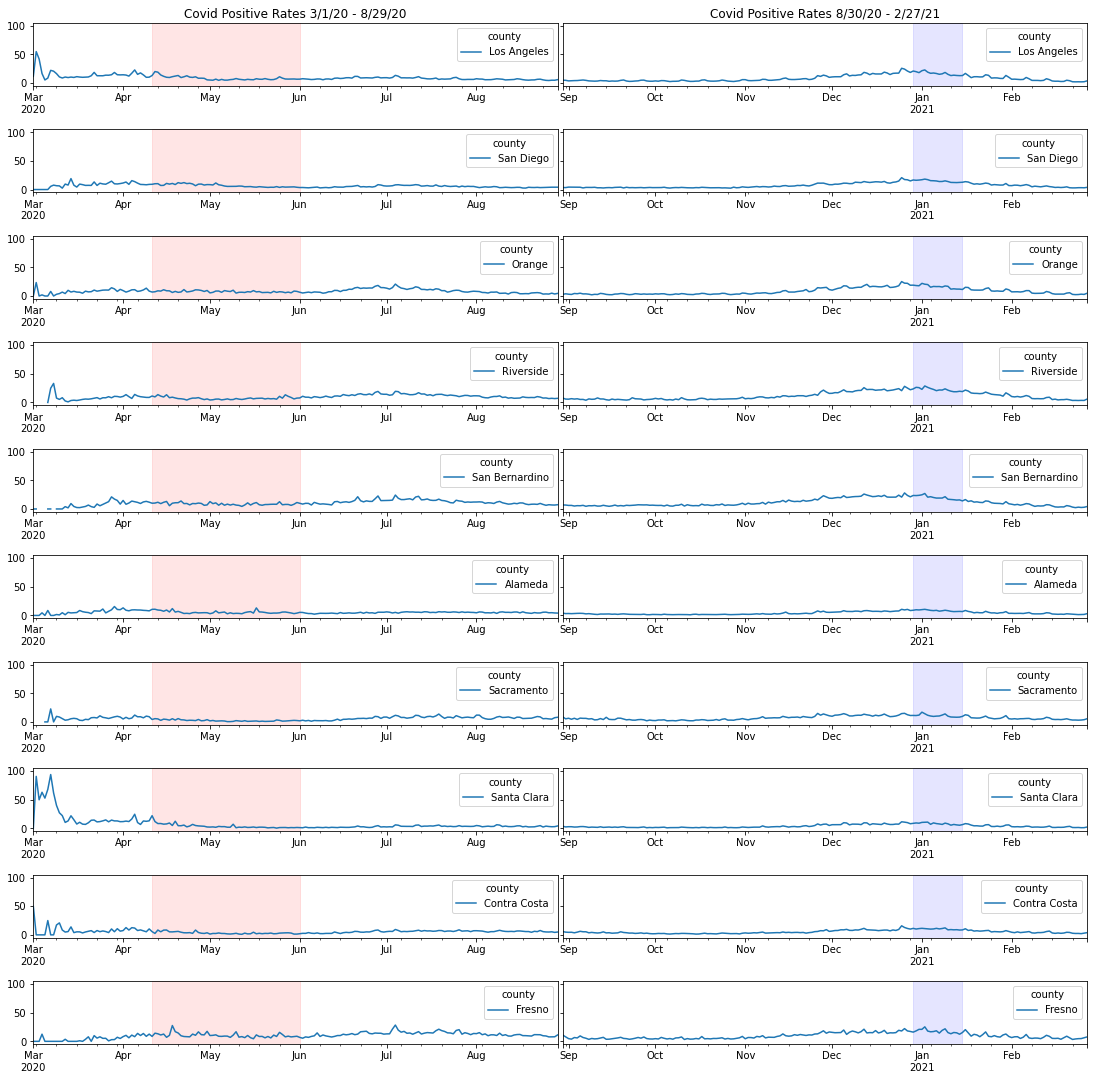

In [9]:
# get rid of this
fig, axes = plt.subplots(ncols = 2, nrows = 10, sharey = True)
axes[0,0].set_title('Covid Positive Rates 3/1/20 - 8/29/20')
axes[0,1].set_title('Covid Positive Rates 8/30/20 - 2/27/21')
la1.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[0,0])
la2.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[0,1])

sd1.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[1,0])
sd2.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[1,1])

orange1.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[2,0])
orange2.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[2,1])

riverside1.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[3,0])
riverside2.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[3,1])

sb1.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[4,0])
sb2.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[4,1])

alameda1.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[5,0])
alameda2.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[5,1])

sac1.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[6,0])
sac2.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[6,1])

sc1.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[7,0])
sc2.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[7,1])

cc1.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[8,0])
cc2.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[8,1])

fresno1.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[9,0])
fresno2.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[9,1])

fig.tight_layout(pad=0.01)
for x in range(0,10):
    axes[x][0].axvspan(dates.datestr2num('2020-04-11'), dates.datestr2num('2020-06-1'), color='red', alpha=0.1)
    axes[x][1].axvspan(dates.datestr2num('2020-12-29'), dates.datestr2num('2021-01-15'), color='blue', alpha=0.1)
    for y in range(0, 2):
        axes[x][y].set(xlabel=None)
        

We also do the same to the graph with all the counties combined.

(0.0, 100.0)

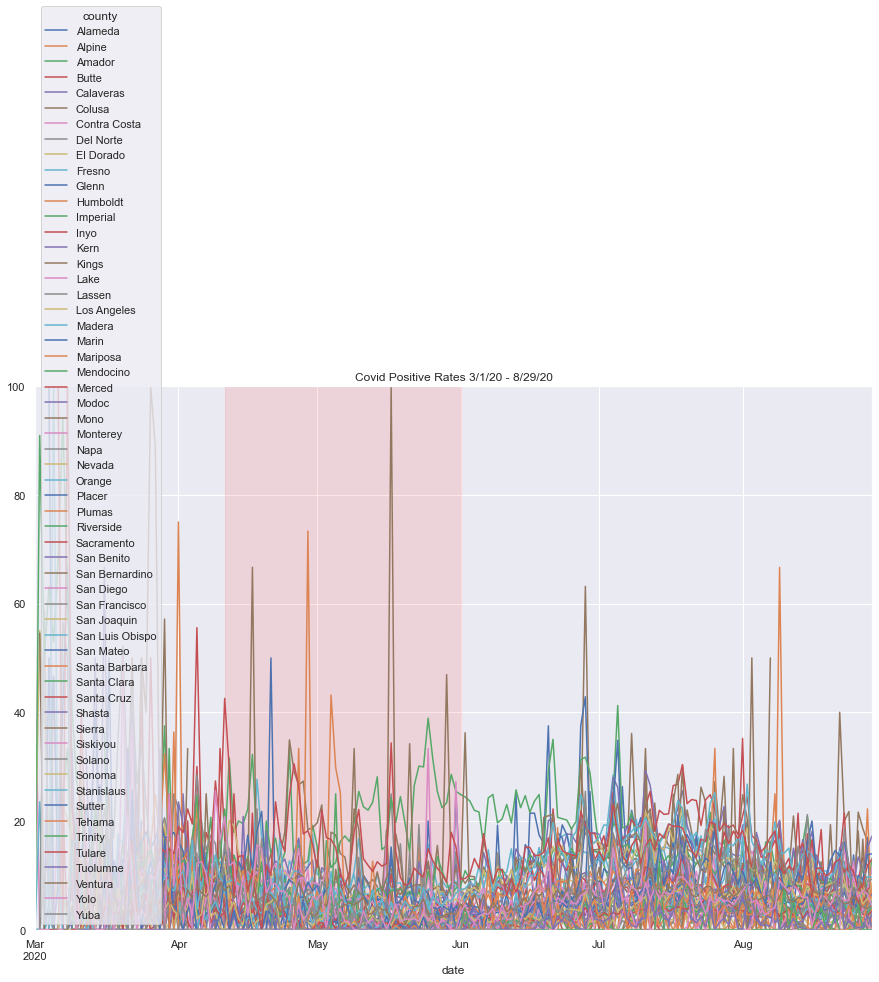

In [57]:
ax = covid_df_stim1.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 10))
ax.set_title('Covid Positive Rates 3/1/20 - 8/29/20')
ax.axvspan(dates.datestr2num('2020-04-11'), dates.datestr2num('2020-06-1'), color='red', alpha=0.1)
plt.ylim(0, 100)

(0.0, 100.0)

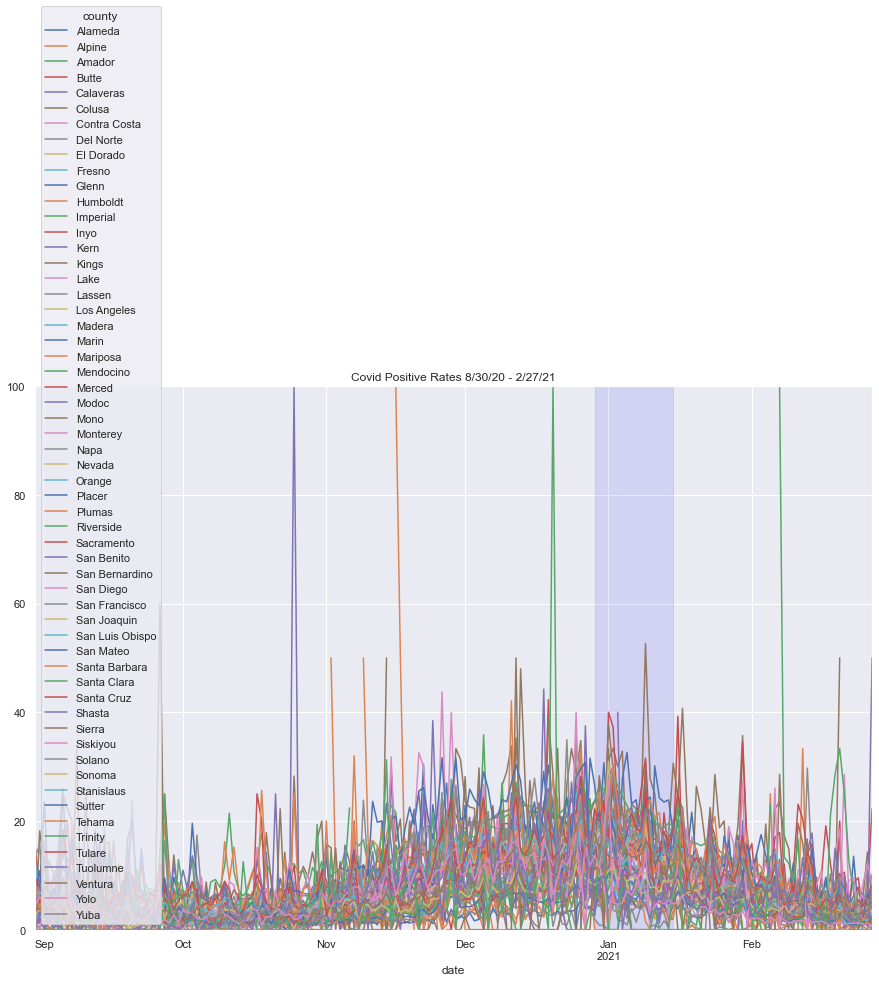

In [58]:
ax = covid_df_stim2.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 10))
ax.set_title('Covid Positive Rates 8/30/20 - 2/27/21')
ax.axvspan(dates.datestr2num('2020-12-29'), dates.datestr2num('2021-01-15'), color='blue', alpha=0.1)
plt.ylim(0, 100)

In [12]:
covid_df_subset

,date,county,rate
0,2020-03-01,Alameda,0.000000
1,2020-03-02,Alameda,0.000000
2,2020-03-03,Alameda,0.000000
3,2020-03-04,Alameda,4.545455
4,2020-03-05,Alameda,0.000000
...,...,...,...
15647,2021-02-23,Santa Clara,1.456712
15648,2021-02-24,Santa Clara,1.617149
15649,2021-02-25,Santa Clara,1.200241
15650,2021-02-26,Santa Clara,1.253357


In [61]:
before_stim_1 = covid_df[(covid_df['date'] <= '2020-04-11') & (covid_df['date'] >= '2020-03-11')] 
before_stim_1

after_stim_1 = covid_df[(covid_df['date'] > '2020-04-11') & (covid_df['date'] <= '2020-05-11')]
after_stim_1



# '2020-12-29'), dates.datestr2num('2021-01-15'

before_stim_2 = covid_df[(covid_df['date'] < '2020-12-29') & (covid_df['date'] >= '2020-11-29')]
after_stim_2 = covid_df_subset[(covid_df_subset['date'] >= '2020-12-29') & (covid_df_subset['date'] < '2021-01-29')]

Text(0, 0.5, 'Counts')

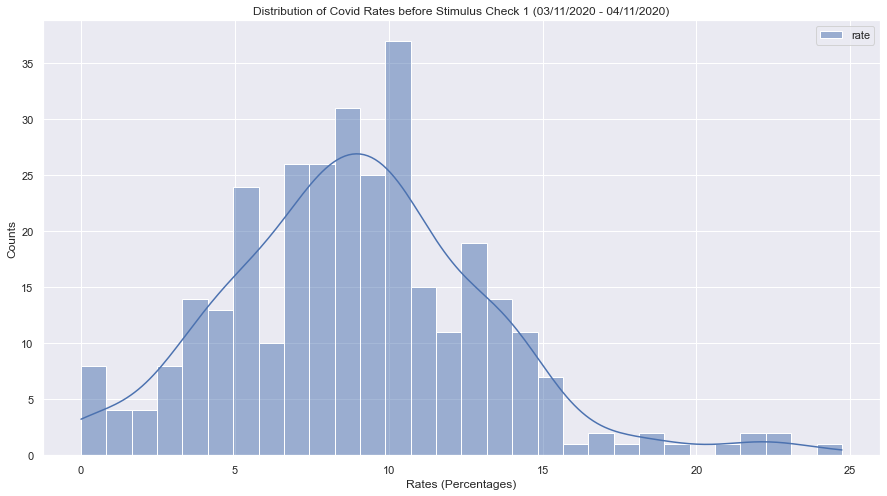

In [60]:
# Histogram before the first stim check
sns.set(rc = {'figure.figsize':(15,8)})

before_stim_1_hist = sns.histplot(before_stim_1, bins = 30, kde = True)

plt.title('Distribution of Covid Rates before Stimulus Check 1 (03/11/2020 - 04/11/2020)')
plt.xlabel('Rates (Percentages)')
plt.ylabel('Counts')


Text(0, 0.5, 'Counts')

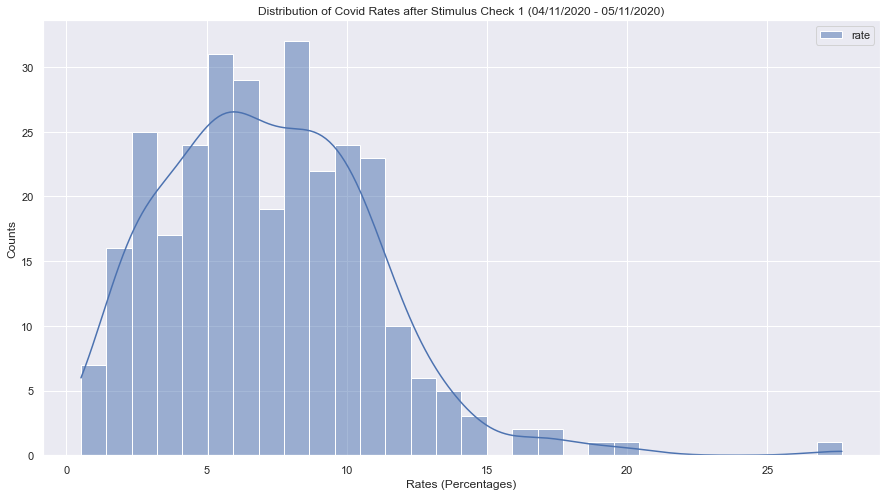

In [40]:
# Histogram after the first stim check
sns.set(rc = {'figure.figsize':(15,8)})

before_stim_1_hist = sns.histplot(after_stim_1, bins = 30, kde = True)

plt.title('Distribution of Covid Rates after Stimulus Check 1 (04/11/2020 - 05/11/2020)')
plt.xlabel('Rates (Percentages)')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

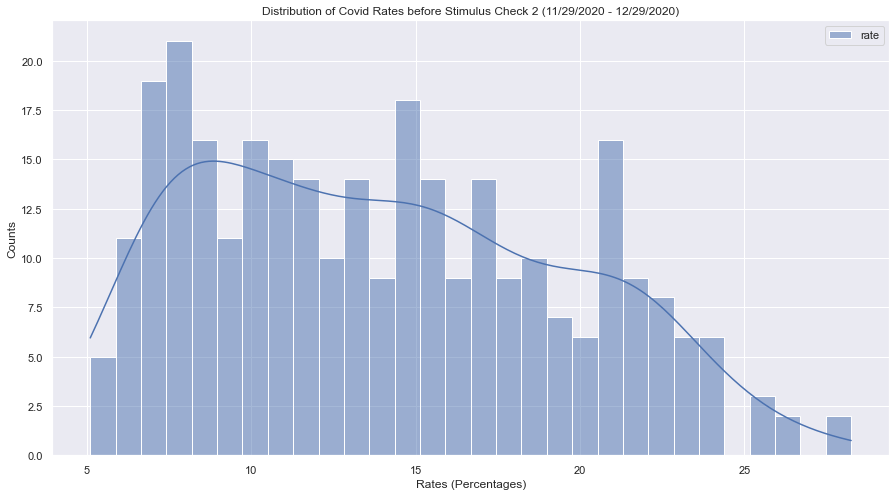

In [48]:
# Histogram before the second stim check
sns.set(rc = {'figure.figsize':(15,8)})

before_stim_1_hist = sns.histplot(before_stim_2, bins = 30, kde = True)

plt.title('Distribution of Covid Rates before Stimulus Check 2 (11/29/2020 - 12/29/2020)')
plt.xlabel('Rates (Percentages)')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

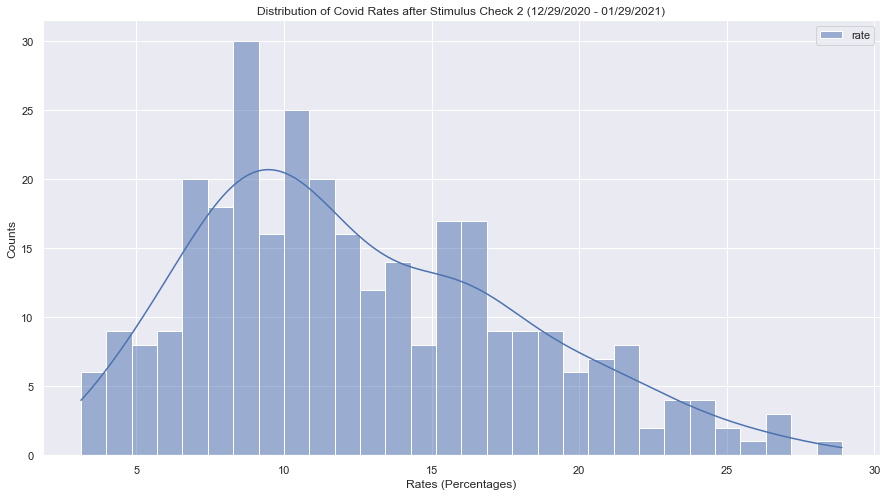

In [47]:
# Histogram after the second stim check
sns.set(rc = {'figure.figsize':(15,8)})

before_stim_1_hist = sns.histplot(after_stim_2, bins = 30, kde = True)

plt.title('Distribution of Covid Rates after Stimulus Check 2 (12/29/2020 - 01/29/2021)')
plt.xlabel('Rates (Percentages)')
plt.ylabel('Counts')

1 analysis: Now that we have two histograms: before stim and after stim check. We want to do a t-test to compare these two.

2 analysis: 